In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import groupby
import plotly
import plotly.graph_objects as go
import pandas as pd

In [2]:
# Data Classify
def classify_imgs(min_blobs, max_blobs, num_list, num_imgs):
    """Classify images according to the number of blobs inside"""
    num_idx = []
    for i in range(min_blobs, max_blobs+1):
        idx = [] # index list for each numerosity
        for j in range(num_imgs):
            if num_list[j] == i:
                idx.append(j)
        num_idx.append(idx)

        # Show Statistics
        if i == 1:
            print("Images with 1 Blob: ", len(num_idx[i-1]))
        else:
            print("Images with %d Blobs: " % i, len(num_idx[i-1]))
        
    return num_idx

In [3]:
# Rect Density Analysis
def img_stats(N, num_blbs, img):
    """Rect Density Analysis for One Image"""
    img = np.reshape(img, [N, N])
    x_idx = np.nonzero(img)[0]
    y_idx = np.nonzero(img)[1]
    num_pixels = len(x_idx)
    minx = np.min(x_idx)
    maxx = np.max(x_idx)
    miny = np.min(y_idx)
    maxy = np.max(y_idx)
    dx = maxx-minx+1
    dy = maxy-miny+1
    rect_area = (maxx-minx+1)*(maxy-miny+1)
    rect_centroid = [minx+(maxx-minx)/2, miny+(maxy-miny)/2]             
    area_dens = num_pixels/rect_area
    num_dens = num_blbs/rect_area
    return rect_area, rect_centroid, area_dens, num_dens, dx, dy

def rect_dens_list(min_blobs, max_blobs, num_idx, blob_list, size_list, num_list):
    """Rect Density Analysis for All Images"""
    rect_area_list = []
    rect_centroid_list = []
    area_dens_list = []
    num_dens_list = []
    rect_dx_list = []
    rect_dy_list = []

    for i in range(min_blobs, max_blobs+1):
        num_blbs = i
        num_imgs = len(num_idx[i-1])
        rect_area_sublist = []
        rect_centroid_sublist = []
        area_dens_sublist = []
        num_dens_sublist = []
        rect_dx_sublist = []
        rect_dy_sublist = []
        
        for j in range(num_imgs):
            img_idx = num_idx[i-1][j]
            rect_area, rect_centroid, area_dens, num_dens, dx, dy = img_stats(blob_list, size_list, num_list, img_idx)
            rect_area_sublist.append(rect_area)
            rect_centroid_sublist.append(rect_centroid)
            area_dens_sublist.append(area_dens)
            num_dens_sublist.append(num_dens)
            rect_dx_sublist.append(dx)
            rect_dy_sublist.append(dy)
        rect_area_list.append(rect_area_sublist)
        rect_centroid_list.append(rect_centroid_sublist)
        area_dens_list.append(area_dens_sublist)
        num_dens_list.append(num_dens_sublist)
        rect_dx_list.append(rect_dx_sublist)
        rect_dy_list.append(rect_dy_sublist)
    return rect_area_list, rect_centroid_list, area_dens_list, num_dens_list, rect_dx_list, rect_dy_list

def data_params(data_list, n_labels):
    """Statistical Analysis"""
    mean_list = []
    median_list = []
    std_list = []
    for n in range(1, n_labels+1):
        data = data_list[n-1]
        mean_list.append(np.mean(data))
        median_list.append(np.median(data))
        std_list.append(np.std(data))
    
    mean_list = np.reshape(mean_list, [-1])
    median_list = np.reshape(median_list, [-1])
    std_list = np.reshape(std_list, [-1])
    
    return mean_list, median_list, std_list

In [27]:
# plot
max_blobs = 9

def dens_bar(dens_list, n_labels, fmt, title):
    
    dens_mean, _, dens_std = data_params(dens_list, n_labels)
    
    fig, ax = plt.subplots(figsize=(max_blobs, 5))

    labels = [str(i) for i in range(1, max_blobs+1)]
    x = np.arange(1, n_labels+1)  # the label locations
    width = 0.35  # the width of the bars

    ax.errorbar(x, dens_mean, yerr=dens_std, fmt=fmt, markersize=9)

    ax.set_title(title)
    ax.set_xlabel('Number of Blobs', fontsize=15)
    ax.set_ylabel('Density', fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=12)
    #ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.grid()
    plt.title(title, size=18)

    plt.show()
    
def rect_centroid_plot(x_mean, y_mean, x_std, y_std, n_labels, title):
        
    fig, ax = plt.subplots(figsize=(max_blobs, 5))

    labels = [str(i) for i in range(1, max_blobs+1)]
    x = np.arange(1, n_labels+1)  # the label locations
    width = 0.35  # the width of the bars

    ax.errorbar(x-width/2, x_mean, yerr=x_std, fmt='o', markersize=9, label='x')
    ax.errorbar(x+width/2, y_mean, yerr=y_std, fmt='^', markersize=9, label='y')
  
    ax.set_title(title)
    ax.set_xlabel('Number of Blobs', fontsize=15)
    ax.set_ylabel('xy', fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=12)
    ax.grid()
    ax.legend(loc = 'upper left')
    plt.title(title, size=18)

    plt.show()
    
def rect_dxdy_plot(x_mean, y_mean, x_std, y_std, n_labels, title):
        
    fig, ax = plt.subplots(figsize=(max_blobs, 5))

    labels = [str(i) for i in range(1, max_blobs+1)]
    x = np.arange(1, n_labels+1)  # the label locations
    width = 0.35  # the width of the bars

    ax.errorbar(x-width/2, x_mean, yerr=x_std, fmt='o', markersize=9, label='Dx')
    ax.errorbar(x+width/2, y_mean, yerr=y_std, fmt='^', markersize=9, label='Dy')
  
    ax.set_title(title)
    ax.set_xlabel('Number of Blobs', fontsize=15)
    ax.set_ylabel('DxDy', fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=12)
    ax.grid()
    ax.legend(loc = 'upper left')
    plt.title(title, size=18)

    plt.show()

    
def dens_bar_dele1(dens_list, n_labels, fmt, title):
    
    dens_mean, _, dens_std = data_params(dens_list, n_labels)
    
    dens_mean = np.delete(dens_mean, 0)
    dens_std = np.delete(dens_std, 0)
    
    fig, ax = plt.subplots(figsize=(max_blobs, 5))

    labels = [str(i) for i in range(2, max_blobs+1)]
    x = np.arange(2, n_labels+1)  # the label locations
    width = 0.35  # the width of the bars

    ax.errorbar(x, dens_mean, yerr=dens_std, fmt=fmt, markersize=9)

    ax.set_title(title)
    ax.set_xlabel('Number of Blobs', fontsize=15)
    ax.set_ylabel('Density', fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=12)
    #ax.set_yticks(np.arange(0, 0.16, 0.01))
    ax.grid()
    plt.title(title, size=18)

    plt.show()

# Testing Data with at least 20 pixel spacing

In [5]:
from create_data_natural import density_analysis_lists
MODELNAME = 'Testing_Data_has_spacing'
N = 100
img_list, num_list = density_analysis_lists()

img_count: 1000
img_count: 2000
img_count: 3000
img_count: 4000
img_count: 5000
img_count: 6000
img_count: 7000
img_count: 8000
img_count: 9000
(9000, 10000)


In [25]:
centroid_list = []
d_blob_list = []
min_blobs_nds = int(np.min(num_list))
max_blobs_nds = 9
n_labels = max_blobs_nds - min_blobs_nds + 1
num_imgs = np.shape(img_list)[0]
num_idx = classify_imgs(min_blobs_nds, max_blobs_nds, num_list[0], num_imgs)

IndexError: list index out of range

In [26]:
num_list # array of numerosities of each image
print(num_list.shape)
num_list

(1, 9000)


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

In [8]:
img_list # array of all the pixel values 0 or 1 of each image
print(img_list.shape)

(9000, 10000)


In [9]:
# Area Density & Numerosity Density
rect_area_list = []
rect_centroid_list = []
area_dens_list = []
num_dens_list = []
num_dens_frac_list = []
rect_x_list = []
rect_y_list = []
rect_dx_list = []
rect_dy_list = []

for i in range(min_blobs_nds, max_blobs_nds+1):
    num_blbs = i
    imgs = img_list[num_idx[i-1]]
    num_imgs = len(num_idx[i-1])
    rect_area_sublist = []
    rect_centroid_sublist = []
    area_dens_sublist = []
    num_dens_sublist = []
    num_dens_frac_sublist = []
    rect_x_sublist = []
    rect_y_sublist = []
    rect_dx_sublist = []
    rect_dy_sublist = []
    for j in range(num_imgs):
        img = imgs[j]
        rect_area, rect_centroid, area_dens, num_dens, dx, dy = img_stats(N, num_blbs, img)
        rect_area_sublist.append(rect_area)
        rect_centroid_sublist.append(rect_centroid)
        area_dens_sublist.append(area_dens)
        num_dens_sublist.append(num_dens)
        num_dens_frac_sublist.append(num_dens*N*N)
        rect_x_sublist.append(rect_centroid[0])
        rect_y_sublist.append(rect_centroid[1])
        rect_dx_sublist.append(dx)
        rect_dy_sublist.append(dy)
    rect_area_list.append(rect_area_sublist)
    rect_centroid_list.append(rect_centroid_sublist)
    area_dens_list.append(area_dens_sublist)
    num_dens_list.append(num_dens_sublist)
    num_dens_frac_list.append(num_dens_frac_sublist)
    rect_x_list.append(rect_x_sublist)
    rect_y_list.append(rect_y_sublist)
    rect_dx_list.append(rect_dx_sublist)
    rect_dy_list.append(rect_dy_sublist)

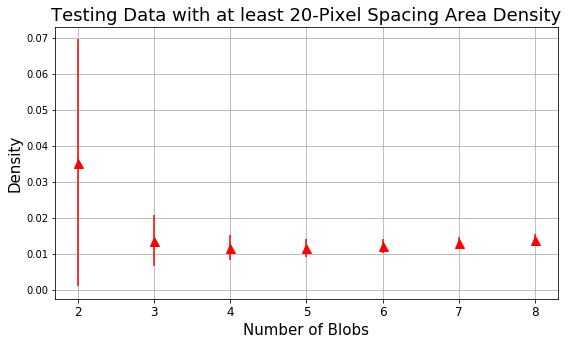

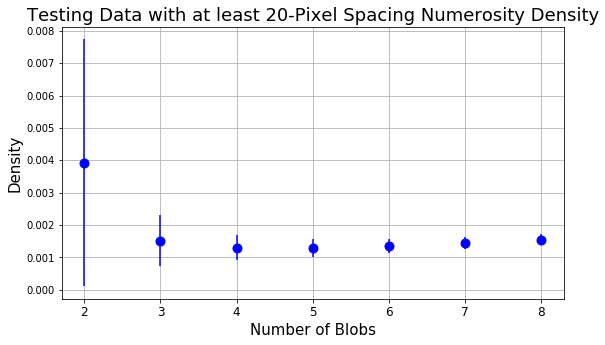

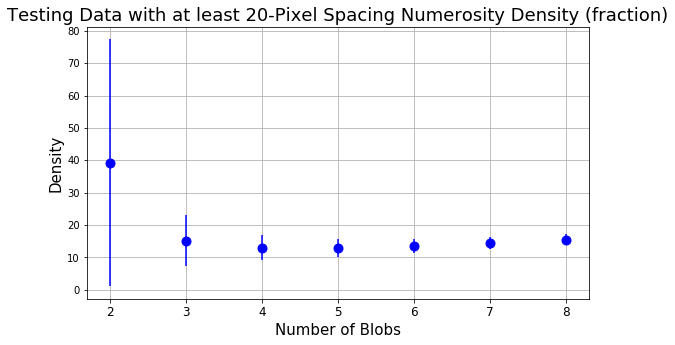

In [29]:
dens_bar_dele1(area_dens_list, n_labels, 'r^', 'Testing Data with at least 20-Pixel Spacing Area Density')
dens_bar_dele1(num_dens_list, n_labels, 'bo', 'Testing Data with at least 20-Pixel Spacing Numerosity Density')
dens_bar_dele1(num_dens_frac_list, n_labels, 'bo', 'Testing Data with at least 20-Pixel Spacing Numerosity Density (fraction)')

In [11]:
# Bounding Rectangle Position Distribution
x_mean_list = []
y_mean_list = []
x_std_list = []
y_std_list = []
dx_mean_list = []
dy_mean_list = []
dx_std_list = []
dy_std_list = []

for i in range(n_labels):
    rect_centroid = np.reshape(rect_centroid_list[i], [-1, 2])
    x_rect_centroid = rect_centroid[:,0]
    y_rect_centroid = rect_centroid[:,1]
    x_mean = np.mean(x_rect_centroid)
    y_mean = np.mean(y_rect_centroid)
    x_std = np.std(x_rect_centroid)
    y_std = np.std(y_rect_centroid)
    #dx_rect_centroid = x_rect_centroid - x_mean
    #dy_rect_centroid = y_rect_centroid - y_mean
    #dx_mean = np.mean(dx_rect_centroid)
    #dy_mean = np.mean(dy_rect_centroid)
    #dx_std = np.std(dx_rect_centroid)
    #dy_std = np.std(dy_rect_centroid)
    dx_mean = np.mean(rect_dx_list[i])
    dy_mean = np.mean(rect_dy_list[i])
    dx_std = np.std(rect_dx_list[i])
    dy_std = np.std(rect_dy_list[i])
    x_mean_list.append(x_mean)
    y_mean_list.append(y_mean)
    x_std_list.append(x_std)
    y_std_list.append(y_std)
    dx_mean_list.append(dx_mean)
    dy_mean_list.append(dy_mean)
    dx_std_list.append(dx_std)
    dy_std_list.append(dy_std)

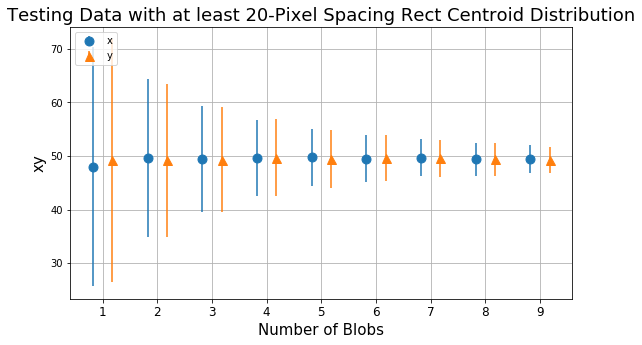

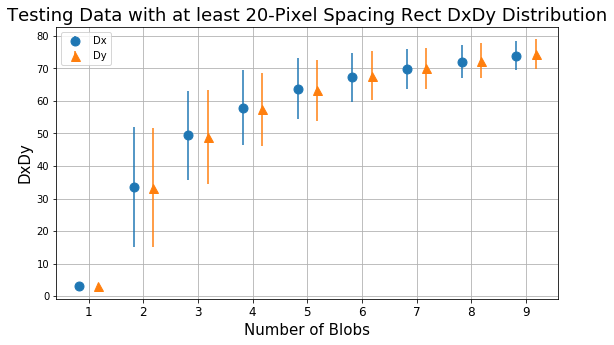

In [12]:
rect_centroid_plot(x_mean_list, y_mean_list, x_std_list, y_std_list, n_labels, 'Testing Data with at least 20-Pixel Spacing Rect Centroid Distribution')
rect_dxdy_plot(dx_mean_list, dy_mean_list, dx_std_list, dy_std_list, n_labels, 'Testing Data with at least 20-Pixel Spacing Rect DxDy Distribution')


# Violin Plot

In [13]:
def dens_violin(dens_list, n_labels, title):
    
    fig, ax = plt.subplots(figsize=(max_blobs, 5))

    labels = [str(i) for i in range(1, max_blobs+1)]
    means, medians, _ = data_params(dens_list, n_labels)
    pos = np.arange(1, n_labels+1)  # positions of the violins
    inds = np.arange(1, len(medians) + 1)

    ax.violinplot(dens_list, pos, vert=True, widths=0.5, showmeans=False, showextrema=False, showmedians=False, points=100, bw_method=None)

    ax.set_title(title)
    ax.set_xlabel('Number of Blobs', fontsize=15)
    ax.set_ylabel('Density', fontsize=15)
    ax.set_xticks(pos)
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_ylim(0,0.08)
    ax.hlines(means, inds-0.2, inds, color='k', linestyle='-', lw=1)
    ax.hlines(medians, inds, inds+0.2, color='r', linestyle='dotted', lw=1.5)
    ax.grid()
    plt.title(title, size=18)

    plt.show()
    
def rect_violin(data_list, n_labels, label, title):
    
    fig, ax = plt.subplots(figsize=(max_blobs, 5))

    labels = [str(i) for i in range(1, max_blobs+1)]
    means, medians, _ = data_params(data_list, n_labels)
    pos = np.arange(1, n_labels+1)  # positions of the violins
    inds = np.arange(1, len(medians) + 1)

    ax.violinplot(data_list, pos, vert=True, widths=0.5, showmeans=False, showextrema=True, showmedians=False, points=100, bw_method=None)

    ax.set_title(title)
    ax.set_xlabel('Number of Blobs', fontsize=15)
    ax.set_ylabel(label, fontsize=15)
    ax.set_xticks(pos)
    ax.set_xticklabels(labels, fontsize=12)
    #ax.set_yticks(np.arange(0, 0.06, 0.01))
    ax.hlines(means, inds-0.2, inds, color='k', linestyle='-', lw=1)
    ax.hlines(medians, inds, inds+0.2, color='r', linestyle='dotted', lw=1.5)
    ax.grid()
    plt.title(title, size=18)

    plt.show()

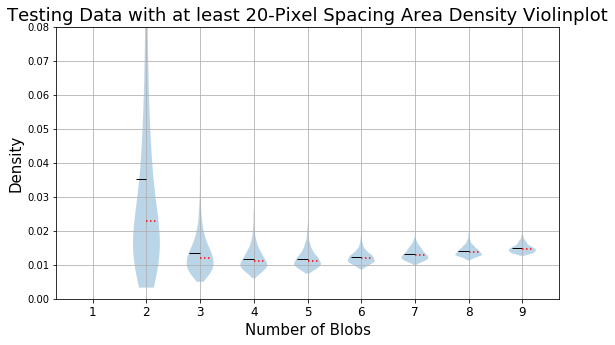

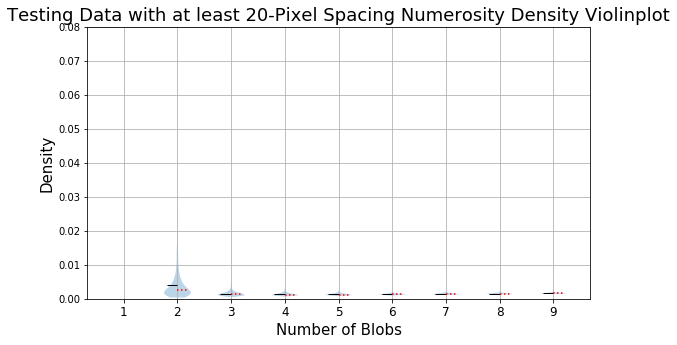

In [14]:
dens_violin(area_dens_list, n_labels, 'Testing Data with at least 20-Pixel Spacing Area Density Violinplot')
dens_violin(num_dens_list, n_labels, 'Testing Data with at least 20-Pixel Spacing Numerosity Density Violinplot')

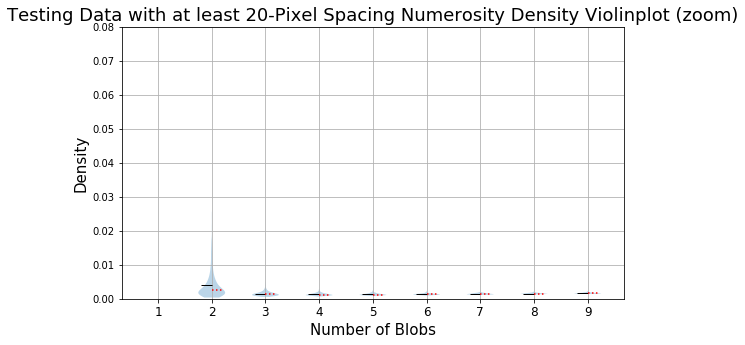

In [15]:
dens_violin(num_dens_list, n_labels, 'Testing Data with at least 20-Pixel Spacing Numerosity Density Violinplot (zoom)')

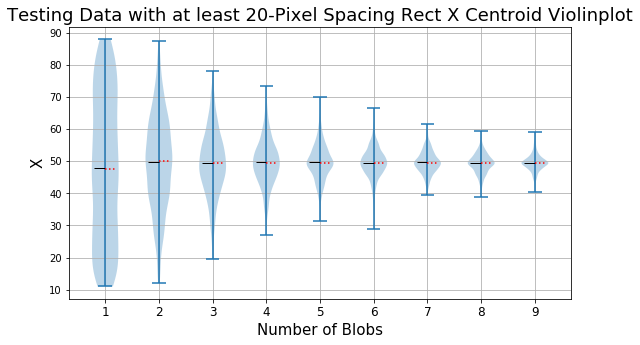

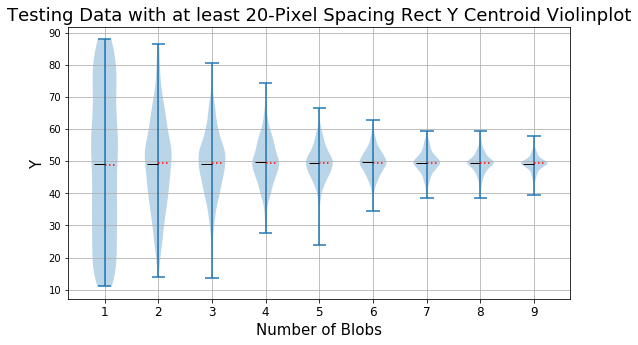

In [16]:
rect_violin(rect_x_list, n_labels, 'X', 'Testing Data with at least 20-Pixel Spacing Rect X Centroid Violinplot')
rect_violin(rect_y_list, n_labels, 'Y', 'Testing Data with at least 20-Pixel Spacing Rect Y Centroid Violinplot')

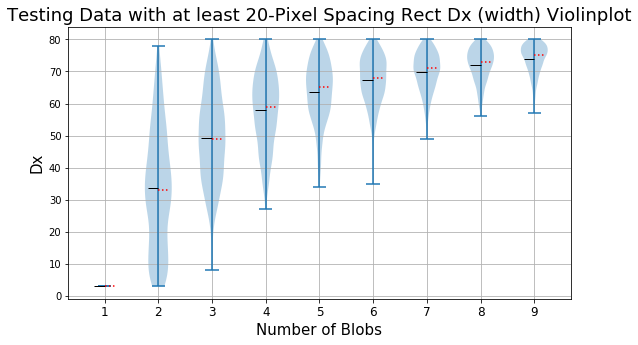

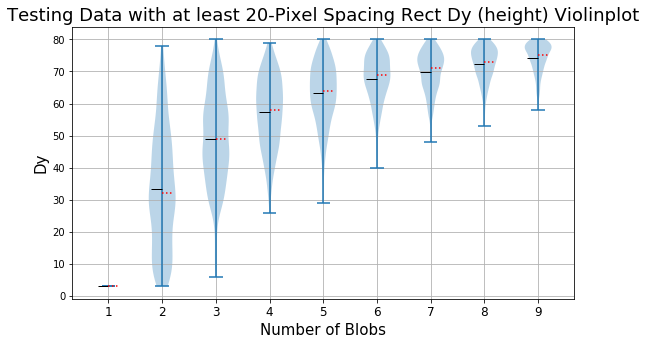

In [17]:
rect_violin(rect_dx_list, n_labels, 'Dx', 'Testing Data with at least 20-Pixel Spacing Rect Dx (width) Violinplot')
rect_violin(rect_dy_list, n_labels, 'Dy', 'Testing Data with at least 20-Pixel Spacing Rect Dy (height) Violinplot')

In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/violin_data.csv")

fig = go.Figure(data=go.Violin(y=df['total_bill'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Total Bill'))

fig.update_layout(yaxis_zeroline=False)
fig.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [19]:
fig = go.Figure(data=go.Violin(y=rect_x_list[0], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Total Bill'))

fig.update_layout(yaxis_zeroline=False)
fig.show()

In [20]:
fig = go.Figure()

n_labels = 9
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9']#, '10', '11', '12', '13', '14', '15']
pos = np.arange(1, n_labels+1)

for i in range(len(pos)):
    fig.add_trace(go.Violin(y=num_dens_list[i],
                            name=labels[i],
                            box_visible=True,
                            meanline_visible=True))

fig.show()

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/violin_data.csv")

fig = go.Figure()

days = ['Thur', 'Fri', 'Sat', 'Sun']

for day in days:
    fig.add_trace(go.Violin(x=df['day'][df['day'] == day],
                            y=df['total_bill'][df['day'] == day],
                            name=day,
                            box_visible=True,
                            meanline_visible=True))

fig.show()

NameError: name 'medians' is not defined

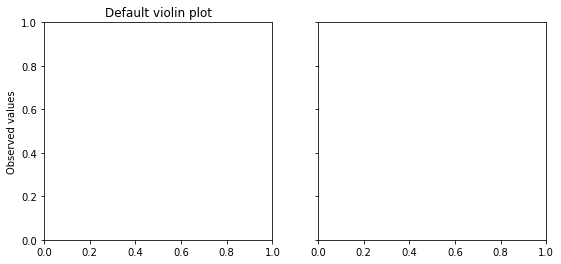

In [22]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
ax1.hlines(medians, inds, inds+0.2, color='k', linestyle='dashed', lw=1)
ax1.violinplot(data)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
mean = np.mean(data, axis=1)

whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
#ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
#ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)
ax2.hlines(mean, inds-0.2, inds, color='k', linestyle='-', lw=1)
ax2.hlines(medians, inds, inds+0.2, color='b', linestyle='dotted', lw=1.5)

# set style for the axes
labels = ['A', 'B', 'C', 'D']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()